In [1]:
#This code will extract text from .docx file of 3GPP

In [2]:
import os
from docx import Document

def preprocess_docx(docx_path, output_folder):
    # Create output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Load the Word document
    doc = Document(docx_path)

    # Flag to determine whether to skip content
    skip_content = False

    output_text_path = os.path.join(output_folder, "extracted_text.txt")

    with open(output_text_path, "w", encoding="utf-8") as output_file:
        for i, paragraph in enumerate(doc.paragraphs):
            # Check if the starting or ending lines are present in the paragraph
            if "3rd Generation Partnership Project (3GPP TM)" in paragraph.text:
                skip_content = True
                continue
            elif "All rights reserved." in paragraph.text:
                skip_content = False
                continue

            # Skip content if the flag is True
            if skip_content:
                continue

            # Process text as it is
            text = paragraph.text + "\n"
            output_file.write(text)
            print(text)

    print(f"Extracted text saved to: {output_text_path}")

# Example usage
docx_path = r'/Users/aadivikram/Desktop/3GPP_extracted/Rel-18/33_series/33128-i40.docx'
output_folder = r'/Users/aadivikram/Desktop/3GPP_extracted/output_p'
preprocess_docx(docx_path, output_folder)

3GPP TS 33.128 V18.4.0 (2023-06)

Technical Specification

3rd Generation Partnership Project;

Technical Specification Group Services and System Aspects;

Security;

Protocol and procedures for Lawful Interception (LI);

Stage 3

(Release 18)

			

  	








Keywords

5G, 4G, 3G, Security, LI, Protocol, Procedures



3GPP

Postal address



3GPP support office address

650 Route des Lucioles - Sophia Antipolis

Valbonne - FRANCE

Tel.: +33 4 92 94 42 00 Fax: +33 4 93 65 47 16

Internet

https://www.3gpp.org



Copyright Notification

No part may be reproduced except as authorized by written permission.
The copyright and the foregoing restriction extend to reproduction in all media.



© 2023, 3GPP Organizational Partners (ARIB, ATIS, CCSA, ETSI, TSDSI, TTA, TTC).



UMTS™ is a Trade Mark of ETSI registered for the benefit of its members

3GPP™ is a Trade Mark of ETSI registered for the benefit of its Members and of the 3GPP Organizational Partners
LTE™ is a Trade Mark of ETSI regist

In [3]:
#Best chunk creation in .txt file

In [10]:
import re

# Read text from the input file
with open('/Users/aadivikram/Desktop/3GPP_extracted/output_p/extracted_text.txt', 'r') as file:
    text = file.read()

# Find the indices of the first occurrence of '3GPP TS' and 'Contents'
first_3gpp_ts = text.find('3GPP TS')
first_contents = text.find('Contents')

# Find the indices of the second occurrence of 'Foreword'
first_foreword = text.find('Foreword')
second_foreword = text.find('Foreword', first_foreword + 1)

# Find the index of the first occurrence of 'Introduction' after the second 'Foreword'
first_introduction = text.find('Introduction', second_foreword)

# Find the indices of the second occurrence of '1 Scope'
first_scope = text.find('1	Scope')
second_scope = text.find('1	Scope', first_scope + 1)

# Extract the first chunk between '3GPP TS' and 'Contents'
if first_3gpp_ts != -1 and first_contents != -1:
    first_chunk = text[first_3gpp_ts:first_contents]
    print("Chunk 1:")
    print(first_chunk.strip())
    print("=" * 50)

# Extract the second chunk between 'Contents' and the second 'Foreword'
if first_contents != -1 and second_foreword != -1:
    second_chunk = text[first_contents:second_foreword]
    print("\nChunk 2:")
    print(second_chunk.strip())
    print("=" * 50)

# Extract the third chunk between the second 'Foreword' and the first 'Introduction'
if second_foreword != -1 and first_introduction != -1:
    third_chunk = text[second_foreword:first_introduction]
    print("\nChunk 3:")
    print(third_chunk.strip())
    print("=" * 50)

# Extract the fourth chunk between 'Introduction' and the second '1 Scope'
if first_introduction != -1 and second_scope != -1:
    fourth_chunk = text[first_introduction:second_scope]
    print("\nChunk 4:")
    print(fourth_chunk.strip())
    print("=" * 50)

# Extract the remaining text based on the given regex pattern after Chunk 4
remaining_text = text[second_scope:]
sections = re.split(r'\n(?=\d+(\.\d+){0,2}\s)(?!\.\d)', remaining_text)

print("\nRemaining Text Sections:")
# Print non-empty and relevant sections
chunk_count = 4  # Initialize chunk count from the previous chunks
for i, section in enumerate(sections, start=1):
    if section and section.strip() and not re.match(r'^\.?\d+\s*$', section.strip()):
        chunk_count += 1  # Increment chunk count for each new section
        print(f"Chunk {chunk_count}:")
        print(section.strip())
        print("=" * 50)  # Separator for better visualization

# If there's no remaining text, don't print anything
if chunk_count == 4:
    print("No remaining text.")

Chunk 1:
3GPP TS 33.128 V18.4.0 (2023-06)
Technical Specification
3rd Generation Partnership Project;
Technical Specification Group Services and System Aspects;
Security;
Protocol and procedures for Lawful Interception (LI);
Stage 3
(Release 18)
			
  	




Keywords
5G, 4G, 3G, Security, LI, Protocol, Procedures

3GPP
Postal address

3GPP support office address
650 Route des Lucioles - Sophia Antipolis
Valbonne - FRANCE
Tel.: +33 4 92 94 42 00 Fax: +33 4 93 65 47 16
Internet
https://www.3gpp.org

Copyright Notification
No part may be reproduced except as authorized by written permission.
The copyright and the foregoing restriction extend to reproduction in all media.

© 2023, 3GPP Organizational Partners (ARIB, ATIS, CCSA, ETSI, TSDSI, TTA, TTC).

UMTS™ is a Trade Mark of ETSI registered for the benefit of its members
3GPP™ is a Trade Mark of ETSI registered for the benefit of its Members and of the 3GPP Organizational Partners
LTE™ is a Trade Mark of ETSI registered for the benefit of

In [6]:
#Extraction of those in chunks in several chunks in .txt with proper namings

In [7]:
import re
import os

# Read text from the input file
with open('/Users/aadivikram/Desktop/3GPP_extracted/output_p/extracted_text.txt', 'r') as file:
    text = file.read()

# Find the indices of the first occurrence of '3GPP TS' and 'Contents'
first_3gpp_ts = text.find('3GPP TS')
first_contents = text.find('Contents')

# Find the indices of the second occurrence of 'Foreword'
first_foreword = text.find('Foreword')
second_foreword = text.find('Foreword', first_foreword + 1)

# Find the index of the first occurrence of 'Introduction' after the second 'Foreword'
first_introduction = text.find('Introduction', second_foreword)

# Find the indices of the second occurrence of '1 Scope'
first_scope = text.find('1	Scope')
second_scope = text.find('1	Scope', first_scope + 1)


# Initialize variables for chunk text
chunk_texts = []

# Extract the first chunk between '3GPP TS' and 'Contents'
if first_3gpp_ts != -1 and first_contents != -1:
    first_chunk = text[first_3gpp_ts:first_contents]
    chunk_texts.append(first_chunk.strip())

# Extract the second chunk between 'Contents' and the second 'Foreword'
if first_contents != -1 and second_foreword != -1:
    second_chunk = text[first_contents:second_foreword]
    chunk_texts.append(second_chunk.strip())

# Extract the third chunk between the second 'Foreword' and the 'Introduction'
if second_foreword != -1 and first_introduction != -1:
    third_chunk = text[second_foreword:first_introduction]
    chunk_texts.append(third_chunk.strip())
    
# Extract the fourth chunk between the 'Introduction' and the second '1 Scope'
if first_introduction != -1 and second_scope != -1:
    fourth_chunk = text[first_introduction:second_scope]
    chunk_texts.append(fourth_chunk.strip())
    
# Extract the remaining text based on the given regex pattern
remaining_text = text[second_scope:]
sections = re.split(r'\n(?=\d+(\.\d+){0,2}\s)(?!\.\d)', remaining_text)

# Add remaining sections to the chunk_texts list
for section in sections:
    if section and section.strip() and not re.match(r'^\.?\d+\s*$', section.strip()):
        chunk_texts.append(section.strip())

# Create a directory to store chunk files
output_directory = '/Users/aadivikram/Desktop/3GPP_extracted/chunk_text_files'
os.makedirs(output_directory, exist_ok=True)

# Write chunks to individual text files, limited to the first three chunks
for i, chunk_text in enumerate(chunk_texts[:4], start=1):
    lines = chunk_text.strip().split('\n')
    first_line = lines[0].strip()
    if first_line:  # If the first line is not empty
        chunk_name = first_line.replace('/', '_')
    else:
        chunk_name = f"Chunk_{i}"

    chunk_filename = os.path.join(output_directory, f"{chunk_name}.txt")
    with open(chunk_filename, 'w') as chunk_file:
        chunk_file.write(chunk_text)
        print(f"Created file: {chunk_filename}")

Created file: /Users/aadivikram/Desktop/3GPP_extracted/chunk_text_files/3GPP TS 33.128 V18.4.0 (2023-06).txt
Created file: /Users/aadivikram/Desktop/3GPP_extracted/chunk_text_files/Contents.txt
Created file: /Users/aadivikram/Desktop/3GPP_extracted/chunk_text_files/Foreword.txt
Created file: /Users/aadivikram/Desktop/3GPP_extracted/chunk_text_files/Introduction.txt


In [8]:
import re
import os

# Read text from the input file
with open('/Users/aadivikram/Desktop/3GPP_extracted/output_p/extracted_text.txt', 'r') as file:
    text = file.read()

# Find the indices of the first occurrence of '3GPP TS' and 'Contents'
first_3gpp_ts = text.find('3GPP TS')
first_contents = text.find('Contents')

# Find the indices of the second occurrence of 'Foreword'
first_foreword = text.find('Foreword')
second_foreword = text.find('Foreword', first_foreword + 1)

# Find the indices of the second occurrence of '1 Scope'
first_scope = text.find('1	Scope')
second_scope = text.find('1	Scope', first_scope + 1)

# Initialize variables for chunk text
chunk_texts = []

# Extract the first chunk between '3GPP TS' and 'Contents'
if first_3gpp_ts != -1 and first_contents != -1:
    first_chunk = text[first_3gpp_ts:first_contents]
    chunk_texts.append(first_chunk.strip())

# Extract the second chunk between 'Contents' and the second 'Foreword'
if first_contents != -1 and second_foreword != -1:
    second_chunk = text[first_contents:second_foreword]
    chunk_texts.append(second_chunk.strip())

# Extract the third chunk between the second 'Foreword' and the second '1 Scope'
if second_foreword != -1 and second_scope != -1:
    third_chunk = text[second_foreword:second_scope]
    chunk_texts.append(third_chunk.strip())

# Extract the remaining text based on the given regex pattern
remaining_text = text[second_scope:]
sections = re.split(r'\n(?=\d+(\.\d+){0,2}\s)(?!\.\d)', remaining_text)

# Add remaining sections to the chunk_texts list
for section in sections:
    if section and section.strip() and not re.match(r'^\.?\d+\s*$', section.strip()):
        chunk_texts.append(section.strip())

# Create a directory to store chunk files
output_directory = '/Users/aadivikram/Desktop/3GPP_extracted/chunk_text_files'
os.makedirs(output_directory, exist_ok=True)

# Write chunks to individual text files, starting from the 4th chunk
for i, chunk_text in enumerate(chunk_texts[3:], start=4):
    lines = chunk_text.strip().split('\n')
    first_line = lines[0].strip()

    # Extract section number from the first line using regex pattern
    section_number = re.match(r'^(\d+(\.\d+)*)\s', first_line)
    if section_number:
        chunk_name = section_number.group(1)
    else:
        chunk_name = f"Chunk_{i}"

    chunk_filename = os.path.join(output_directory, f"{chunk_name}.txt")
    with open(chunk_filename, 'w') as chunk_file:
        chunk_file.write(chunk_text)
        print(f"Created file: {chunk_filename}")

Created file: /Users/aadivikram/Desktop/3GPP_extracted/chunk_text_files/1.txt
Created file: /Users/aadivikram/Desktop/3GPP_extracted/chunk_text_files/2.txt
Created file: /Users/aadivikram/Desktop/3GPP_extracted/chunk_text_files/3.txt
Created file: /Users/aadivikram/Desktop/3GPP_extracted/chunk_text_files/3.1.txt
Created file: /Users/aadivikram/Desktop/3GPP_extracted/chunk_text_files/3.2.txt
Created file: /Users/aadivikram/Desktop/3GPP_extracted/chunk_text_files/3.3.txt
Created file: /Users/aadivikram/Desktop/3GPP_extracted/chunk_text_files/4.txt
Created file: /Users/aadivikram/Desktop/3GPP_extracted/chunk_text_files/4.1.txt
Created file: /Users/aadivikram/Desktop/3GPP_extracted/chunk_text_files/4.2.txt
Created file: /Users/aadivikram/Desktop/3GPP_extracted/chunk_text_files/4.3.txt
Created file: /Users/aadivikram/Desktop/3GPP_extracted/chunk_text_files/4.4.txt
Created file: /Users/aadivikram/Desktop/3GPP_extracted/chunk_text_files/4.4.1.txt
Created file: /Users/aadivikram/Desktop/3GPP_e

In [ ]:
#contents nikalna in .txt file without XA or X.XA or X.X.XA or X.X.X.XA

In [ ]:
import re

# Read the file
with open('/Users/aadivikram/Desktop/3GPP_extracted/output_p/extracted_text.txt', 'r') as file:
    text = file.read()

# Find the positions of 'Contents' and 'Annex A' occurrences
contents_match = re.search(r'\bContents\b', text)
annex_a_match = re.search(r'\bAnnex A\b', text)

# Ensure there's at least one 'Contents' and one 'Annex A'
if contents_match and annex_a_match:
    # Extract text between 'Contents' and 'Annex A' (including 'Contents')
    contents_start = contents_match.start()
    annex_a_start = annex_a_match.start()
    extracted_text = text[contents_start:annex_a_start].strip()

    # Define the pattern to match 'XA' or 'X.XA' or 'X.X.XA' or 'X.X.X.XA'
    pattern_to_exclude = r'\b\d+(\.\d+){0,3}[A-Z]'

    # Remove lines matching the specified pattern
    filtered_text = re.sub(rf'.*{pattern_to_exclude}.*\n?', '', extracted_text)

    # Get the first line of the text file and add label '0'
    first_line = text.split('\n', 1)[0]
    result_text = f"0 {first_line}\n{filtered_text}"

    # Save the result to a file
    output_file_path = '/Users/aadivikram/Desktop/3GPP_extracted/output_p/extracted_content_output.txt'
    with open(output_file_path, 'w') as output_file:
        output_file.write(result_text)

    print(f"Extracted, filtered, and labeled text saved to {output_file_path}")
else:
    print("Could not find 'Contents' or 'Annex A'.")

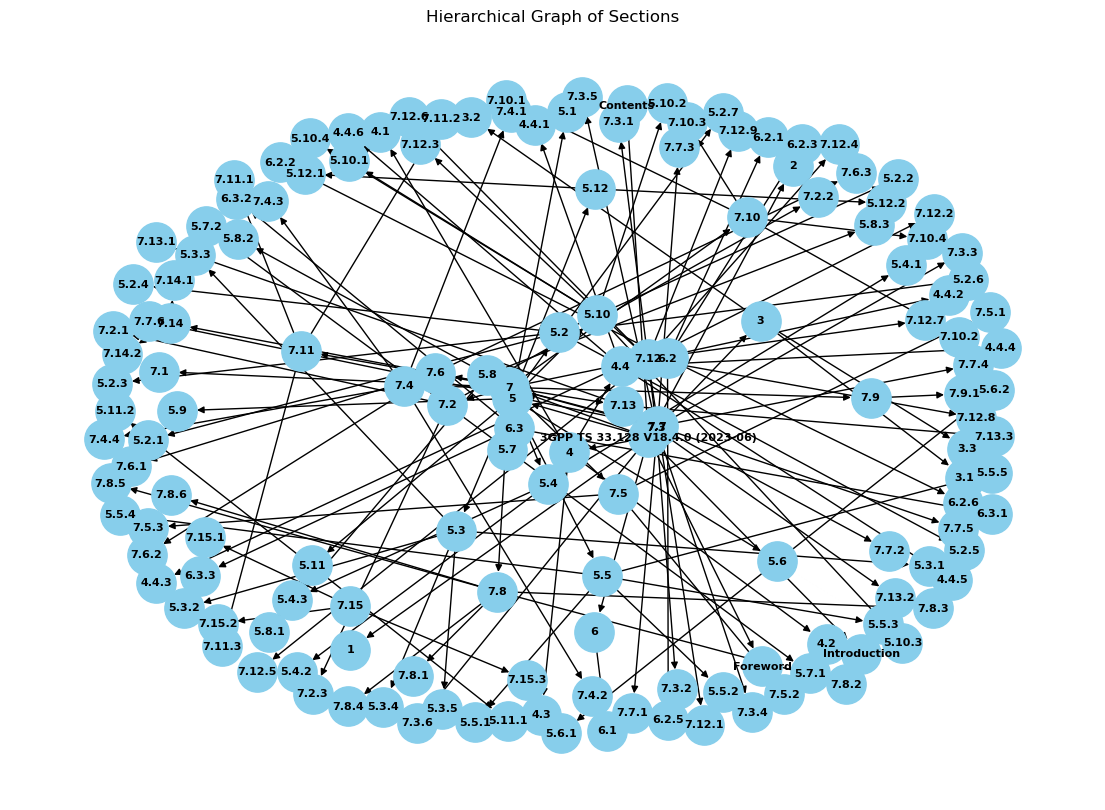

Number of nodes: 153
Number of edges: 149


In [16]:
import networkx as nx
import matplotlib.pyplot as plt

# Read the content from the text file
file_path = '/Users/aadivikram/Desktop/3GPP_extracted/output_p/extracted_content_output.txt'
with open(file_path, 'r') as file:
    text = file.read()

G = nx.DiGraph()

lines = text.strip().split('\n')
depth_limit = 2  # Define the maximum depth level allowed

# Extract the root node name from the first line of the file
root_node_parts = lines[0].split(maxsplit=1)
root_node_name = root_node_parts[1] if len(root_node_parts) > 1 else "Root"  # Set a default name if none found

# Adding the root node and connecting subsequent nodes to it
G.add_node(root_node_name)
for line in lines[1:]:
    parts = line.split()
    section = parts[0]
    if section.count('.') <= depth_limit:
        title = ' '.join(parts[1:])
        G.add_node(section, title=title)

        # Determine the parent section
        if '.' in section:
            parent_section = '.'.join(section.split('.')[:-1])
            G.add_edge(parent_section, section)
        else:
            G.add_edge(root_node_name, section)

# Calculate number of nodes and edges
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

pos = nx.spring_layout(G)
fig, ax = plt.subplots(figsize=(14, 10))
nx.draw(G, pos, ax=ax, with_labels=True, node_size=800, node_color='skyblue', font_weight='bold', font_size=8)
ax.set_title("Hierarchical Graph of Sections")
plt.show()

print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")

In [17]:
import os

# Update the file path for the folder containing the .txt files
folder_path = '/Users/aadivikram/Desktop/3GPP_extracted/chunk_text_files'

# Iterate through each node in the graph and associate the .txt content
for node in G.nodes:
    # Check if the node name matches any .txt file in the folder
    file_name = f"{node}.txt"
    file_path = os.path.join(folder_path, file_name)
    
    # If the file exists, read its content and assign it to the node as an attribute
    if os.path.exists(file_path):
        with open(file_path, 'r') as file:
            node_content = file.read()
            G.nodes[node]['content'] = node_content
    else:
        print(f"No matching file found for node: {node}")


In [21]:
# Print content for specific nodes (change node names as needed)
nodes_to_check = ['6.3.3', 'Contents', '7.8.3']

for node in nodes_to_check:
    if 'content' in G.nodes[node]:
        print(f"Content for node {node}:")
        print(G.nodes[node]['content'])
        print("=" * 50)
    else:
        print(f"No content found for node {node}")


Content for node 6.3.3:
6.3.3	LI at SGW/PGW and ePDG
6.3.3.0	General
Unless otherwise specified, the following clauses apply to both CUPS and non-CUPS EPS architectures. When CUPS architecture is used, unless otherwise specified, the term SGW/PGW refers to both the SGW-U/PGW-U and the SGW-C/PGW-C.
Unless otherwise specified, the following clauses apply in the case of EPC-5GC interworking via combined SMF+PGW-C and UPF+PGW-U.
6.3.3.1	Provisioning over LI_X1
6.3.3.1.1	General
If the warrant is for IRI and CC, then the LI functions in the SGW/PGW shall be provisioned in accordance with clause 6.3.3.1.2 for non-CUPS architecture and clause 6.3.3.1.3 for CUPS architecture, the MDF2 shall be provisioned in accordance with clause 6.3.3.1.4, and the MDF3 shall be provisioned in accordance with clause 6.3.3.1.5.
If the warrant is for IRI only, the IRI-POI in the SGW/PGW shall be provisioned in accordance with clause 6.3.3.1.2 for non-CUPS architecture and clause 6.3.3.1.3 for CUPS architecture 

In [19]:
node_to_check = '6.3'

successors = list(G.successors(node_to_check))
predecessors = list(G.predecessors(node_to_check))

print(f"Successors of node {node_to_check}:")
print(successors)
print("=" * 50)
print(f"Predecessors of node {node_to_check}:")
print(predecessors)


Successors of node 6.3:
['6.3.1', '6.3.2', '6.3.3']
Predecessors of node 6.3:
[]


In [20]:
# Convert the directed graph G to an undirected graph for exploration
undirected_G = G.to_undirected()

node_to_check = '6.3'

neighbors = list(undirected_G.neighbors(node_to_check))

print(f"Neighbors of node {node_to_check}:")
print(neighbors)


Neighbors of node 6.3:
['6.3.1', '6.3.2', '6.3.3']
